

```
# Importing Libraries
```



In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data

In [2]:
df1 = pd.read_csv('/content/Fraudulent_E-Commerce_Transaction_Data.csv')
df1.shape
df1.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


In [3]:
df2 = pd.read_csv('/content/fraudTest.csv')
df2.shape
df2.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df3 = pd.read_csv('/content/CreditCardData.csv')
df3.sample()
df3.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [5]:
df4 = pd.read_csv('/content/bank_transactions_data_2.csv')
df4.sample()
df4.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# concatnate date

In [6]:
df = pd.concat([df1, df2, df3,df4], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 71 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Transaction ID           1472952 non-null  object 
 1   Customer ID              1472952 non-null  object 
 2   Transaction Amount       1472952 non-null  float64
 3   Transaction Date         1472952 non-null  object 
 4   Payment Method           1472952 non-null  object 
 5   Product Category         1472952 non-null  object 
 6   Quantity                 1472952 non-null  int64  
 7   Customer Age             1472952 non-null  int64  
 8   Customer Location        1472952 non-null  object 
 9   Device Used              1472952 non-null  object 
 10  IP Address               1472952 non-null  object 
 11  Shipping Address         1472952 non-null  object 
 12  Billing Address          1472952 non-null  object 
 13  Is Fraudulent            1472952 non-null 

In [8]:
df.isnull().sum()


,0
Transaction ID,0
Customer ID,0
Transaction Amount,0
Transaction Date,0
Payment Method,0
...,...
CustomerOccupation,1470440
TransactionDuration,1470440
LoginAttempts,1470440
AccountBalance,1470440


# feature engineerig

In [9]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour



In [10]:
# 1. Group by cc_num and hour, then count transactions
velocity = df.groupby(['cc_num', 'hour']).size().reset_index(name='trans_velocity')

# 2. Merge it back into the original dataframe
df = df.merge(velocity, on=['cc_num', 'hour'], how='left')


In [11]:
df['amt'] = df['amt'].fillna(df['amt'].median())
df['LoginAttempts'] = df['LoginAttempts'].fillna(df['LoginAttempts'].median())
df['trans_velocity'] = df['trans_velocity'].fillna(df['trans_velocity'].mean())


# fill missing value

In [12]:
categorical_cols = ['gender', 'city', 'state', 'Channel', 'Type of Card',
                    'Device Used', 'category', 'job']

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [13]:
# Remove rows where is_fraud is null
df = df[df['is_fraud'].notnull()].copy()

# Reset index (optional, for cleaner data)
df.reset_index(drop=True, inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 73 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Transaction ID           555719 non-null  object        
 1   Customer ID              555719 non-null  object        
 2   Transaction Amount       555719 non-null  float64       
 3   Transaction Date         555719 non-null  object        
 4   Payment Method           555719 non-null  object        
 5   Product Category         555719 non-null  object        
 6   Quantity                 555719 non-null  int64         
 7   Customer Age             555719 non-null  int64         
 8   Customer Location        555719 non-null  object        
 9   Device Used              555719 non-null  object        
 10  IP Address               555719 non-null  object        
 11  Shipping Address         555719 non-null  object        
 12  Billing Address 

In [15]:
df.shape

(555719, 73)

# Data Visualization

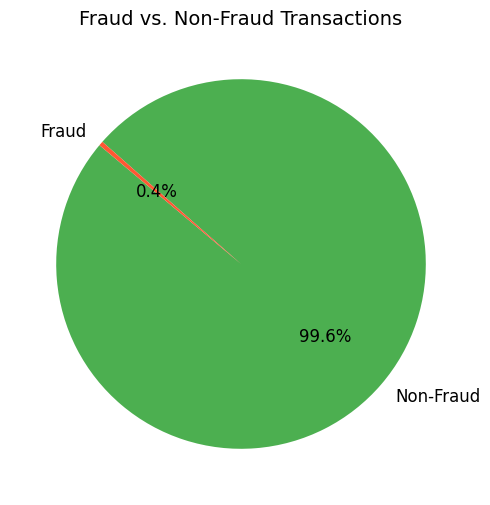

In [16]:
import matplotlib.pyplot as plt

# Count fraud and non-fraud transactions
fraud_counts = df['is_fraud'].value_counts()

# Define labels and colors
labels = ['Non-Fraud', 'Fraud']
colors = ['#4CAF50', '#FF5733']  # Green for non-fraud, red for fraud

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140,
         textprops={'fontsize': 12})

plt.title('Fraud vs. Non-Fraud Transactions', fontsize=14)
plt.show()


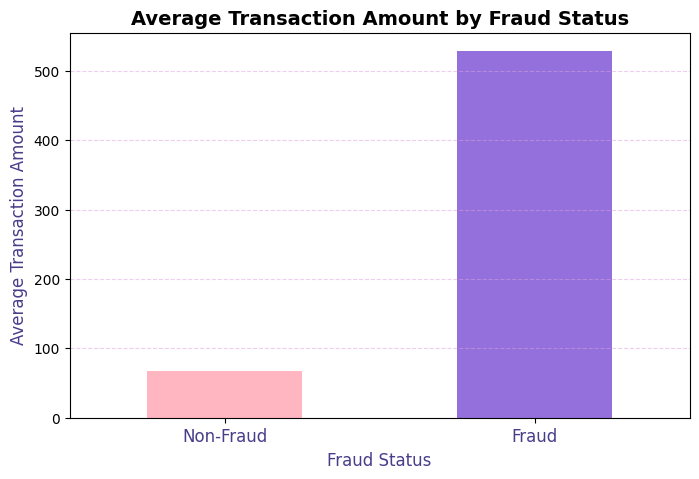

In [17]:
plt.figure(figsize=(8, 5))
df.groupby('is_fraud')['amt'].mean().plot(kind='bar', color=['#FFB6C1', '#9370DB'])  # Light pink & lavender
plt.title('Average Transaction Amount by Fraud Status', fontsize=14, fontweight='bold')
plt.xticks([0,1], ['Non-Fraud', 'Fraud'], rotation=0, fontsize=12, color='#483D8B')
plt.ylabel('Average Transaction Amount', fontsize=12, color='#483D8B')
plt.xlabel('Fraud Status', fontsize=12, color='#483D8B')
plt.grid(axis='y', linestyle='--', alpha=0.5, color='#DDA0DD')  # Soft lavender grid
plt.show()

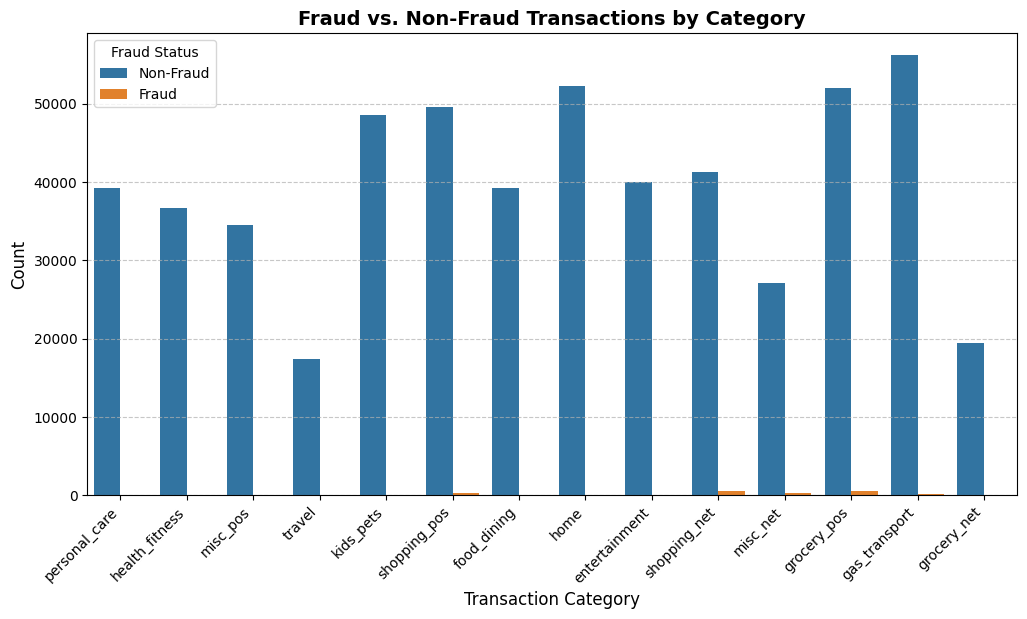

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='category', hue='is_fraud', palette='tab10')  # Use a vibrant palette
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.title('Fraud vs. Non-Fraud Transactions by Category', fontsize=14, fontweight='bold')
plt.xlabel('Transaction Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Fraud Status', labels=['Non-Fraud', 'Fraud'])
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a light grid for better readability
plt.show()

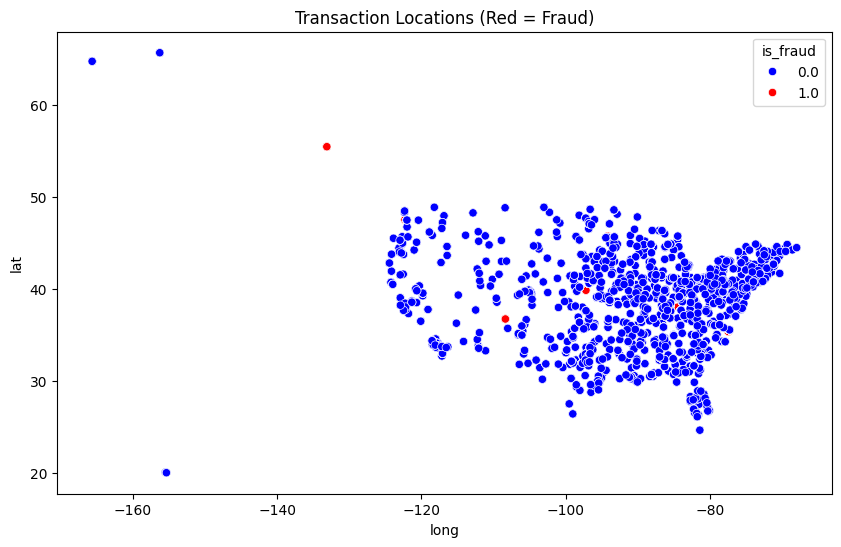

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['long'], y=df['lat'], hue=df['is_fraud'], palette=['blue', 'red'])
plt.title('Transaction Locations (Red = Fraud)')
plt.show()

In [20]:

bins = [0, 100, 500, 1000, 5000, df['amt'].max()]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

df['amt_bin'] = pd.cut(df['amt'], bins=bins, labels=labels, include_lowest=True)


# Feature  Section

In [21]:
feature = df[['amt', 'gender', 'hour', 'city','state','Channel','LoginAttempts','Type of Card',  'trans_velocity','Device Used', 'category','job']]
target = df[[ 'is_fraud']]

#  sampling

In [22]:
!pip install imbalanced-learn

In [23]:
# this help us to equal the amount of fraud and non fraud data
from imblearn.under_sampling import RandomUnderSampler
# Define the undersampling method
# Initialize RandomUnderSampler


#undersampler = RandomUnderSampler()
undersampler = RandomUnderSampler()


# Undersample the data
features, target = undersampler.fit_resample(feature, target)

# Check the distribution of the classes after undersampling
print(f"Class distribution after undersampling:\n{target.value_counts()}")

Class distribution after undersampling:
is_fraud
0.0         2145
1.0         2145
Name: count, dtype: int64


# one hot encoding

In [24]:
from sklearn.preprocessing import OneHotEncoder

# Selecting categorical columns
categorical_cols = ['gender', 'city', 'state', 'Channel',
                    'Type of Card', 'Device Used', 'category', 'job']

# One-Hot Encoding (add handle_unknown='ignore')
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit-transform
features_ohe = ohe.fit_transform(features[categorical_cols])

# Get encoded column names
encoded_cols = ohe.get_feature_names_out(categorical_cols)

# Convert to DataFrame
features_ohe_df = pd.DataFrame(features_ohe, columns=encoded_cols, index=features.index)


# View result
features_ohe_df.head()


,gender_M,city_Acworth,city_Adams,city_Afton,city_Akron,city_Albany,city_Alder,city_Alexandria,city_Allenhurst,city_Allentown,...,job_Travel agency manager,job_Tree surgeon,job_Video editor,job_Visual merchandiser,job_Warden/ranger,job_Waste management officer,job_Water engineer,job_Web designer,job_Wellsite geologist,job_Writer
55572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397016,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159233,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
544496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
379333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# scaling

In [25]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['amt', 'LoginAttempts',  'trans_velocity' ,'hour']
scaler = StandardScaler()
features[numerical_cols] = scaler.fit_transform(features[numerical_cols])

# concatenate

In [26]:
# Convert the One-Hot Encoded features (NumPy array) into a DataFrame

# Concatenate the numerical columns with the One-Hot Encoded DataFrame
final_features = pd.concat([features[numerical_cols], features_ohe_df, ], axis=1)


# Target Selection
target= target

final_features.shape
final_features.head()

,amt,LoginAttempts,trans_velocity,hour,gender_M,city_Acworth,city_Adams,city_Afton,city_Akron,city_Albany,...,job_Travel agency manager,job_Tree surgeon,job_Video editor,job_Visual merchandiser,job_Warden/ranger,job_Waste management officer,job_Water engineer,job_Web designer,job_Wellsite geologist,job_Writer
55572,-0.662625,0.0,-0.015554,0.288097,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397016,-0.619962,0.0,-0.015554,1.123510,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159233,-0.783873,0.0,2.889719,-0.189283,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
544496,-0.421995,0.0,-0.390428,-0.905351,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
379333,-0.533038,0.0,0.312461,-0.308627,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# split and train

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    final_features, target, test_size=0.2, random_state=42
)


In [28]:
# Display the shapes of the splits
print(f"Training Features Shape: {X_train.shape}")
print(f"Test Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Test Target Shape: {y_test.shape}")

Training Features Shape: (3432, 1250)
Test Features Shape: (858, 1250)
Training Target Shape: (3432, 1)
Test Target Shape: (858, 1)


# model train

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       452
         1.0       0.96      0.94      0.95       406

    accuracy                           0.95       858
   macro avg       0.95      0.95      0.95       858
weighted avg       0.95      0.95      0.95       858

Confusion Matrix:
 [[436  16]
 [ 25 381]]


In [30]:
from sklearn.metrics import accuracy_score

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")


Accuracy on test set: 95.22%


In [31]:


import pickle

# Save trained model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save OneHotEncoder
with open('encoder.pkl', 'wb') as encoder_file:
    pickle.dump(ohe, encoder_file)

# Save StandardScaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model, encoder, and scaler saved successfully!")




Model, encoder, and scaler saved successfully!
